In [1]:
import pandas as pd
import numpy as np
import re
import random
import string
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('training_set_VU_DM.csv', sep = ',')
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [5]:
# Loop through each column in the DataFrame and check for NaN values
nan_columns = 0
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f"{col} contains {df[col].isnull().sum()} NaN values.")
        nan_columns += 1
    else:
        print(f"{col} does not contain any NaN values.")
print(nan_columns)

srch_id does not contain any NaN values.
date_time does not contain any NaN values.
site_id does not contain any NaN values.
visitor_location_country_id does not contain any NaN values.
visitor_hist_starrating contains 4706481 NaN values.
visitor_hist_adr_usd contains 4705359 NaN values.
prop_country_id does not contain any NaN values.
prop_id does not contain any NaN values.
prop_starrating does not contain any NaN values.
prop_review_score contains 7364 NaN values.
prop_brand_bool does not contain any NaN values.
prop_location_score1 does not contain any NaN values.
prop_location_score2 contains 1090348 NaN values.
prop_log_historical_price does not contain any NaN values.
position does not contain any NaN values.
price_usd does not contain any NaN values.
promotion_flag does not contain any NaN values.
srch_destination_id does not contain any NaN values.
srch_length_of_stay does not contain any NaN values.
srch_booking_window does not contain any NaN values.
srch_adults_count does n

In [6]:
#Checking for correlations between user clicks and the columns that did not have any NaN values

# Get the subset of columns that do not contain NaN values
cols_without_nans = [col for col in df.columns if df[col].isnull().sum() == 0]

# Compute the correlation matrix between the non-NaN columns and the click_bool column
corr_matrix = df[cols_without_nans].corrwith(df['click_bool'])

# Print the correlation coefficients for each column
print(corr_matrix)

srch_id                        0.000194
site_id                        0.008497
visitor_location_country_id   -0.004806
prop_country_id               -0.006222
prop_id                        0.000246
prop_starrating                0.030788
prop_brand_bool                0.000866
prop_location_score1           0.002184
prop_log_historical_price      0.003360
position                      -0.164992
price_usd                      0.000510
promotion_flag                 0.039440
srch_destination_id            0.001193
srch_length_of_stay            0.002647
srch_booking_window            0.001707
srch_adults_count              0.004620
srch_children_count            0.006012
srch_room_count                0.007044
srch_saturday_night_bool       0.001150
random_bool                    0.005819
click_bool                     1.000000
booking_bool                   0.782889
dtype: float64


In [7]:
# Compute the correlation matrix between all columns
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

                              srch_id   site_id  visitor_location_country_id  \
srch_id                      1.000000  0.003331                    -0.006097   
site_id                      0.003331  1.000000                    -0.305921   
visitor_location_country_id -0.006097 -0.305921                     1.000000   
visitor_hist_starrating     -0.010462  0.309078                    -0.256252   
visitor_hist_adr_usd         0.000316  0.099104                    -0.073231   
prop_country_id             -0.005468 -0.312593                     0.482787   
prop_id                     -0.000166  0.002943                     0.000432   
prop_starrating             -0.001577  0.174845                    -0.112911   
prop_review_score           -0.002959 -0.071645                     0.064279   
prop_brand_bool             -0.003828 -0.196217                     0.182405   
prop_location_score1         0.000439  0.178399                    -0.121392   
prop_location_score2         0.002368  0

In [10]:
top_correlations = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()[:6]
print(top_correlations)

booking_bool             booking_bool               1.000000
                         click_bool                 0.782889
comp5_rate               comp8_rate                 0.636605
comp3_rate_percent_diff  comp8_rate_percent_diff    0.634962
                         comp5_rate_percent_diff    0.590658
comp1_inv                comp5_inv                  0.512121
dtype: float64


In [9]:
top_correlations2 = corr_matrix.unstack().sort_values(ascending=True).drop_duplicates()[:5]
print(top_correlations2)

prop_country_id              orig_destination_distance   -0.365723
                             site_id                     -0.312593
visitor_location_country_id  site_id                     -0.305921
srch_length_of_stay          srch_saturday_night_bool    -0.293019
visitor_hist_starrating      prop_country_id             -0.285770
dtype: float64


<ipython-input-15-183ec1f0fc4f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(means.index, rotation=45, ha='right', fontsize=12)


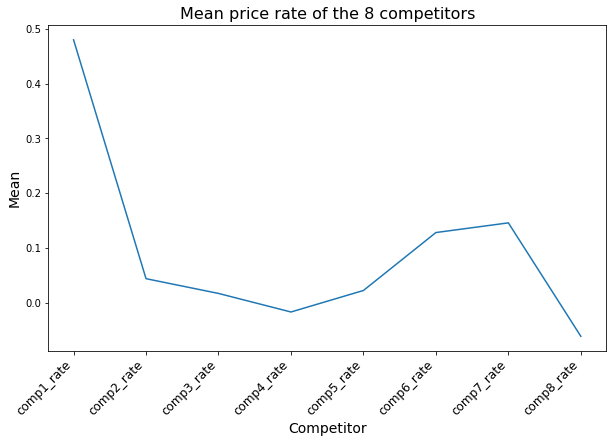

In [15]:
# Calculate the mean of each column of competitot 1 till 8 for the price
price_columns = ['comp1_rate', 'comp2_rate', 'comp3_rate', 'comp4_rate', 'comp5_rate', 'comp6_rate', 'comp7_rate', 'comp8_rate']

means = df[price_columns].mean(skipna=True)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(means.index, means.values)

ax.set_xticklabels(means.index, rotation=45, ha='right', fontsize=12)

ax.set_xlabel('Competitor', fontsize = 14)
ax.set_ylabel('Mean', fontsize = 14)
ax.set_title('Mean price rate of the 8 competitors', fontsize = 16)

plt.show()

<ipython-input-16-2ca9f4916d17>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(means.index, rotation=45, ha='right', fontsize=12)


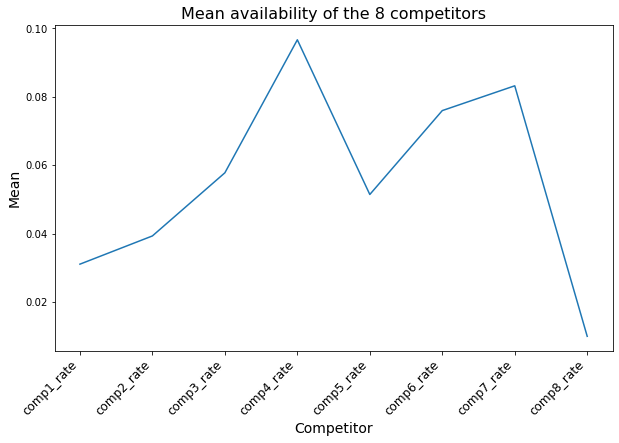

In [16]:
# Calculate the mean of each column of competitot 1 till 8 for the availability
availability_columns = ['comp1_inv', 'comp2_inv', 'comp3_inv', 'comp4_inv', 'comp5_inv', 'comp6_inv', 'comp7_inv', 'comp8_inv']

means2 = df[availability_columns].mean(skipna=True)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(means2.index, means2.values)

ax.set_xticklabels(means.index, rotation=45, ha='right', fontsize=12)

ax.set_xlabel('Competitor', fontsize = 14)
ax.set_ylabel('Mean', fontsize = 14)
ax.set_title('Mean availability of the 8 competitors', fontsize = 16)

plt.show()

In [12]:
#Dropping columns with lots of missing values:
missing_df = pd.DataFrame(df.isnull().sum()/len(df))*100
missing_df.reset_index(inplace=True)
missing_df.rename(columns={0: 'percentage', 'index':'column'}, inplace=True)
missing_df = missing_df.sort_values(by = 'percentage', ascending = False)

cols_to_drop = missing_df[missing_df['percentage'] > 20]['column'].unique() 
# cols_to_drop = missing_df['column'].unique()
train_df = df.drop(cols_to_drop, axis=1)
train_df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_location_score1', 'prop_log_historical_price',
       'position', 'price_usd', 'promotion_flag', 'srch_destination_id',
       'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
       'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool',
       'random_bool', 'click_bool', 'booking_bool'],
      dtype='object')

In [13]:
train_df.head()

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
0,1,2013-04-04 08:32:15,12,187,219,893,3,3.5,1,2.83,...,23246,1,0,4,0,1,1,1,0,0
1,1,2013-04-04 08:32:15,12,187,219,10404,4,4.0,1,2.20,...,23246,1,0,4,0,1,1,1,0,0
2,1,2013-04-04 08:32:15,12,187,219,21315,3,4.5,1,2.20,...,23246,1,0,4,0,1,1,1,0,0
3,1,2013-04-04 08:32:15,12,187,219,27348,2,4.0,1,2.83,...,23246,1,0,4,0,1,1,1,0,0
4,1,2013-04-04 08:32:15,12,187,219,29604,4,3.5,1,2.64,...,23246,1,0,4,0,1,1,1,0,0


In [14]:
#filling in missing values for the attributes: prop_review_score 

train_df['prop_review_score'] = train_df['prop_review_score'].fillna(0.0) #BecauseNaN indicates that there is no information available and a 0 means no reviews

In [15]:
train_df['prop_review_score']

0          3.5
1          4.0
2          4.5
3          4.0
4          3.5
          ... 
4958342    4.0
4958343    4.0
4958344    3.5
4958345    5.0
4958346    2.5
Name: prop_review_score, Length: 4958347, dtype: float64

In [16]:
train_df

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
0,1,2013-04-04 08:32:15,12,187,219,893,3,3.5,1,2.83,...,23246,1,0,4,0,1,1,1,0,0
1,1,2013-04-04 08:32:15,12,187,219,10404,4,4.0,1,2.20,...,23246,1,0,4,0,1,1,1,0,0
2,1,2013-04-04 08:32:15,12,187,219,21315,3,4.5,1,2.20,...,23246,1,0,4,0,1,1,1,0,0
3,1,2013-04-04 08:32:15,12,187,219,27348,2,4.0,1,2.83,...,23246,1,0,4,0,1,1,1,0,0
4,1,2013-04-04 08:32:15,12,187,219,29604,4,3.5,1,2.64,...,23246,1,0,4,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,2013-06-30 19:55:18,5,219,219,77700,3,4.0,1,1.61,...,16974,1,21,3,0,1,0,0,0,0
4958343,332785,2013-06-30 19:55:18,5,219,219,88083,3,4.0,1,1.95,...,16974,1,21,3,0,1,0,0,0,0
4958344,332785,2013-06-30 19:55:18,5,219,219,94508,3,3.5,1,1.10,...,16974,1,21,3,0,1,0,0,0,0
4958345,332785,2013-06-30 19:55:18,5,219,219,128360,3,5.0,1,1.95,...,16974,1,21,3,0,1,0,0,1,1


#Preperation for SVM model


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [18]:
train_df_2 = train_df.copy()

In [19]:
train_df_2['date_time'] = pd.to_datetime(train_df_2['date_time'])
train_df_2['month'] = train_df_2['date_time'].dt.month
train_df_2 =  train_df_2.drop('date_time', axis=1)


In [20]:
train_df_2.columns

Index(['srch_id', 'site_id', 'visitor_location_country_id', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_log_historical_price', 'position',
       'price_usd', 'promotion_flag', 'srch_destination_id',
       'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
       'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool',
       'random_bool', 'click_bool', 'booking_bool', 'month'],
      dtype='object')

In [23]:
train_df_2.dtypes

srch_id                          int64
site_id                          int64
visitor_location_country_id      int64
prop_country_id                  int64
prop_id                          int64
prop_starrating                  int64
prop_review_score              float64
prop_brand_bool                  int64
prop_location_score1           float64
prop_log_historical_price      float64
position                         int64
price_usd                      float64
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
random_bool                      int64
click_bool                       int64
booking_bool                     int64
month                            int64
dtype: object

In [24]:
#X are the features to train the model on and Y the target variable
X = train_df_2.drop('booking_bool', axis = 1)
y = train_df_2['booking_bool']

In [25]:
#Splitting the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create and train the SVM model
svm = SVC()
svm.fit(X_train_scaled, y_train)

In [ ]:
# Make predictions on the testing set
y_pred = svm.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

In [ ]:
%time